In [1]:
import nbimporter
import pandas as pd
import math
#import ace_tools as tools

In [2]:
from graph_utilities import lire_graphe, afficher_graphe, visualiser_graphe_par_etape
from graph_utilities import generate_cyclic_graph, generate_chain_graph, generate_spider_graph
from mtd_math import solver, solver_beta, solver_beta_dichotomic
from algo_recherche import recherche_profondeur, recherche_largeur, couverture_balle

In [3]:
# 10 sommets (3.16)
#fichier = r'instances\Stranke94\Stranke94.mtx'

# 29 sommets (5.38)
#fichier = r'instances\bn-mouse_visual-cortex_1\bn-mouse_visual-cortex_1.mtx'

# 34 sommets (5,83)
#fichier = r'instances\karate\karate.mtx'

# 62 sommets (7.87)
#fichier = r'instances\dolphins\dolphins.mtx'

# 105 sommets (12.88)
#fichier = r'instances\polbooks\polbooks.mtx'

# 258 sommets (16.06)
#fichier = r'instances\sphere3\sphere3.mtx'

# 379 sommets (19.47)
#fichier = r'instances\ca-netscience\ca-netscience.mtx'

# 7057 sommets (84.005)
#fichier = r'instances\fb-pages-government\fb-pages-government.mtx'

# 11631 sommets (107.84)
#fichier = r'instances\web-wiki-crocodile\web-wiki-crocodile.mtx'

# 196 591 sommets (443.38)
#fichier = r'instances\loc-gowalla_edges\loc-gowalla_edges.mtx'

#graphe = lire_graphe(fichier)

In [4]:
# Graphe cyclique (4)
#graphe = generate_cyclic_graph(16)

# Graphe en chaîne (4)
#graphe = generate_chain_graph(16)

# Graphe en étoile/spider (4.58)
#graphe = generate_spider_graph(0, leg_length=4, num_legs=5)

In [5]:
#afficher_graphe(graphe)

---

In [6]:
# Définition des graphes à tester
graphes_excep = {
    "Graphe Cycle_7": generate_cyclic_graph(7),
    "Graphe Cycle_16": generate_cyclic_graph(16),
    "Graphe Cycle_18": generate_cyclic_graph(18),
    "Graphe Chaine_7": generate_chain_graph(7),
    "Graphe Chaine_16": generate_chain_graph(16),
    "Graphe Chaine_18": generate_chain_graph(18),
    "Graphe Etoile_7": generate_spider_graph(0, leg_length=3, num_legs=2),
    "Graphe Etoile_16": generate_spider_graph(0, leg_length=5, num_legs=3),
    "Graphe Etoile_21": generate_spider_graph(0, leg_length=4, num_legs=5),
}

In [7]:
# Définition des graphes à tester
graphes = {
    "Stranke94": lire_graphe(r'instances/Stranke94/Stranke94.mtx'),
    "mouse_visual-cortex_1": lire_graphe(r'instances/bn-mouse_visual-cortex_1/bn-mouse_visual-cortex_1.mtx'),
    "karate": lire_graphe(r'instances/karate/karate.mtx'),
    "dolphins": lire_graphe(r'instances/dolphins/dolphins.mtx'),
    "polbooks": lire_graphe(r'instances/polbooks/polbooks.mtx'),
    "sphere3": lire_graphe(r'instances/sphere3/sphere3.mtx'),
    "ca-netscience": lire_graphe(r'instances/ca-netscience/ca-netscience.mtx')
}

In [8]:
# Initialisation du tableau des résultats
resultats = []

# Parcours de chaque graphe
for nom, graphe in graphes_excep.items():
    nb_sommets = len(graphe)
    nb_aretes = sum(len(v) for v in graphe.values()) // 2  # Division par 2 car graphe non orienté
    k = nb_sommets ** 0.5

    try:
        solver_result, solver_cost = solver(graphe)
    except Exception as e:
        solver_result, solver_cost = str(e), None

    try:
        solver_beta_result, solver_beta_cost  = solver_beta(graphe)
    except Exception as e:
        solver_beta_result, solver_beta_cost = str(e), None

    try:
        solver_beta_dico_result, solver_beta_dico_cost = solver_beta_dichotomic(graphe)
    except Exception as e:
        solver_beta_dico_result, solver_beta_dico_cost = str(e), None

    #try:
    #    recherche_p_res, recherche_p_cout = recherche_profondeur(graphe)
    #except Exception as e:
    #    recherche_p_res, recherche_p_cout = str(e), None
    
    try:
        etat, recherche_l_res, recherche_l_cout = recherche_largeur(graphe)
    except Exception as e:
        recherche_l_res, recherche_l_cout = str(e), None

    try:
        couverture_balle_res = couverture_balle(graphe)
        couverture_balle_cout = max([rayon for centre, rayon in couverture_balle_res])
    except Exception as e:
        couverture_balle_res, couverture_balle_cout  = str(e), None
    
    # Ajout des résultats au tableau
    resultats.append({
        "Graphe": nom,
        "V": nb_sommets,
        "E(V)+1": k,
        "B_max": math.ceil(k),

        #"Solveur": solver_result,
        #"Cout Solveur": solver_cost,

        "Solveur_beta": solver_beta_result,
        "Cout Solveur_beta": solver_beta_cost,

        "Solveur dico": solver_beta_dico_result,
        "Cout Solveur dico": solver_beta_dico_cost,

        #"Recherche Profoncdeur": recherche_p_res,
        #"Cout RP": recherche_p_cout,

        "Recherche Largeur": recherche_l_res,
        "Cout RL": recherche_l_cout,
        
        "Couverture des balles": couverture_balle_res,
        "Cout CB": couverture_balle_cout
    })


# Convertir en DataFrame et afficher
df = pd.DataFrame(resultats)

df

Set parameter Username
Set parameter LicenseID to value 2601900
Academic license - for non-commercial use only - expires 2025-12-18


,Graphe,V,E(V)+1,B_max,Solveur_beta,Cout Solveur_beta,Solveur dico,Cout Solveur dico,Recherche Largeur,Cout RL,Couverture des balles,Cout CB
0,Graphe Cycle_7,7,2.645751,3,"[4, 0, 6]",3,"[4, 0, 6]",3,"[0, 2, 4]",3,"[(2, 3), (6, 2)]",3
1,Graphe Cycle_16,16,4.000000,4,"[15, 9, 5, 3]",4,"[15, 9, 5, 3]",4,"[0, 6, 10, 12]",4,"[(9, 4), (15, 3), (4, 2), (2, 1)]",4
2,Graphe Cycle_18,18,4.242641,5,"[14, 3, 8, 10, 11]",5,"[14, 3, 8, 10, 11]",5,"[0, 1, 7, 11, 13]",5,"[(6, 5), (14, 4), (1, 2)]",5
3,Graphe Chaine_7,7,2.645751,3,"[3, 0, 6]",3,"[3, 0, 6]",3,"[0, 4, 6]",3,"[(4, 3), (1, 2)]",3
4,Graphe Chaine_16,16,4.000000,4,"[12, 2, 7, 5]",4,"[12, 2, 7, 5]",4,"[3, 9, 13, 15]",4,"[(8, 4), (2, 3), (14, 2), (12, 1)]",4
5,Graphe Chaine_18,18,4.242641,5,"[14, 3, 8, 10, 11]",5,"[14, 3, 8, 10, 11]",5,"[0, 5, 11, 15, 17]",5,"[(6, 5), (14, 4), (1, 2)]",5
6,Graphe Etoile_7,7,2.645751,3,"[0, 2, 6]",3,"[0, 2, 6]",3,"[0, 2, 6]",3,"[(4, 3), (2, 2)]",3
7,Graphe Etoile_16,16,4.000000,4,"[11, 5, 9, 15]",4,"[11, 5, 9, 15]",4,"[1, 8, 14, 5]",4,"[(11, 4), (3, 3), (9, 2), (15, 1)]",4
8,Graphe Etoile_21,21,4.582576,5,"[0, 19, 16, 18, 1]",5,"[0, 19, 16, 18, 1]",5,"[0, 1, 2, 3, 4]",5,"[(0, 5)]",5


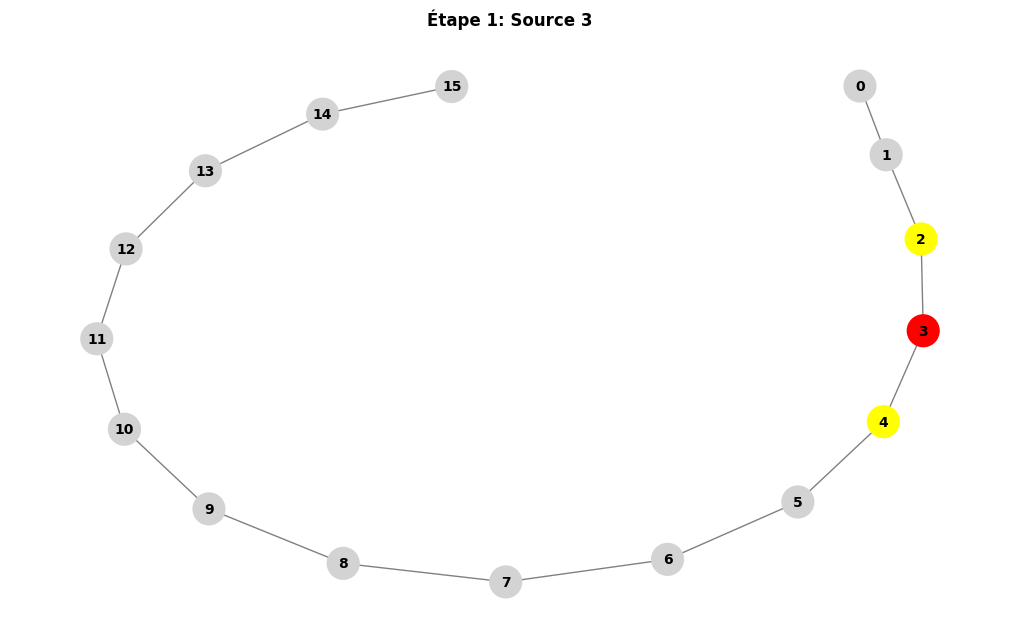

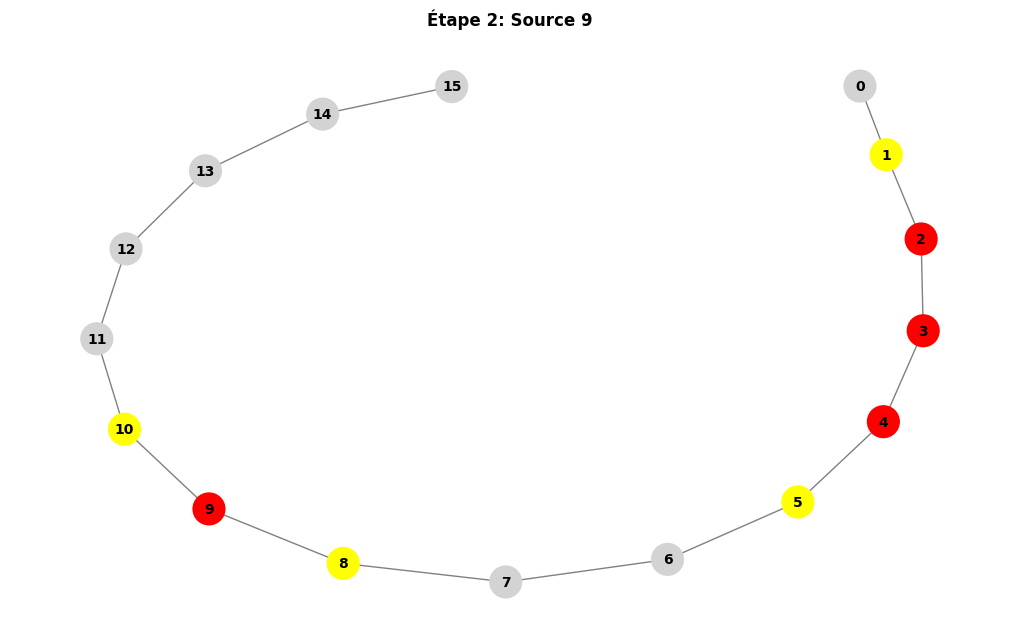

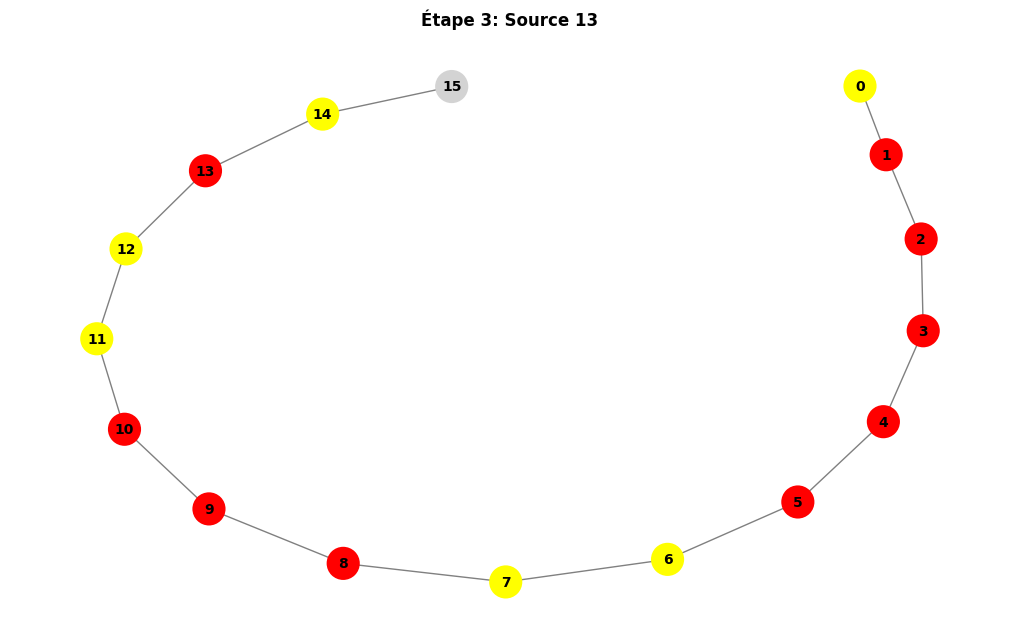

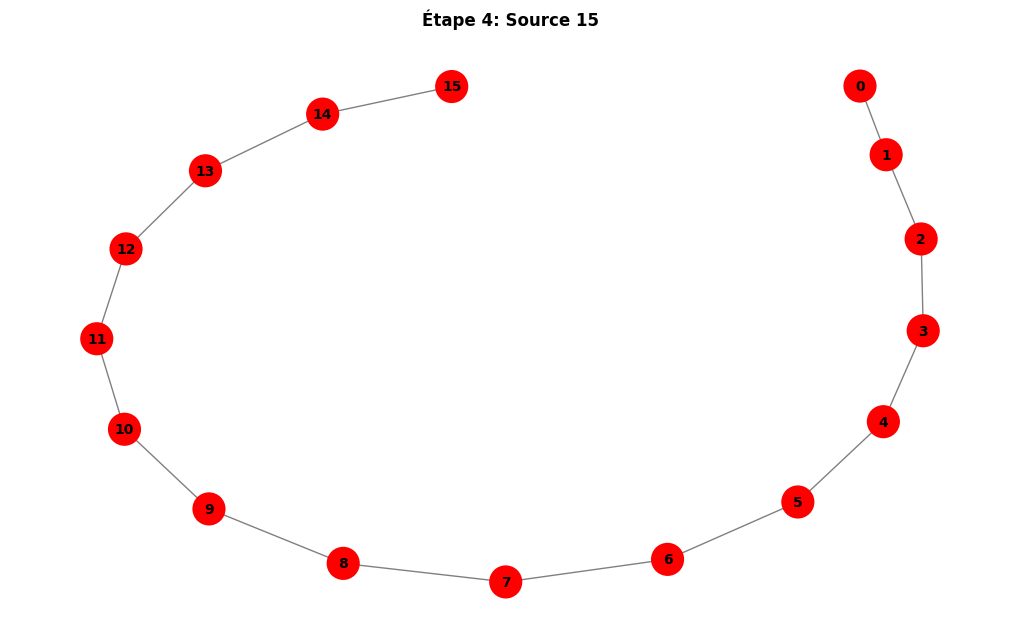

In [12]:
num = 4
#visualiser_graphe_par_etape(graphes_excep[df.iloc[num]["Graphe"]], [centre for centre, rayon in df.iloc[num]["Couverture des balles"]])
visualiser_graphe_par_etape(graphes_excep[df.iloc[num]["Graphe"]], df.iloc[num]["Recherche Largeur"])